<h2>DS12 クラスター分析</h2>
<h3>階層型クラスタリング</h3>

In [1]:
# google colab で実行する場合は以下のコメントアウトを外す
#! wget https://github.com/KHiraGit/sudspg_ds/raw/main/iris.csv

In [2]:
# ライブラリをインポート
import os
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
# 論理コア（logical cores）の数を取得し、環境変数に設定
# https://relaxing-living-life.com/1831/
def set_loky_max_cpu_count():
    physical_cores = psutil.cpu_count(logical=False)
    logical_cores = psutil.cpu_count(logical=True)
    cpu_count = max(1, min(physical_cores, logical_cores))
    os.environ['LOKY_MAX_CPU_COUNT'] = str(cpu_count)
    print(f"LOKY_MAX_CPU_COUNT set to {cpu_count}")
set_loky_max_cpu_count()

LOKY_MAX_CPU_COUNT set to 20


(150, 5)
(30, 5)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
10                5.4               3.7                1.5               0.2   
15                5.7               4.4                1.5               0.4   
20                5.4               3.4                1.7               0.2   

        species  
0   Iris-setosa  
5   Iris-setosa  
10  Iris-setosa  
15  Iris-setosa  
20  Iris-setosa  


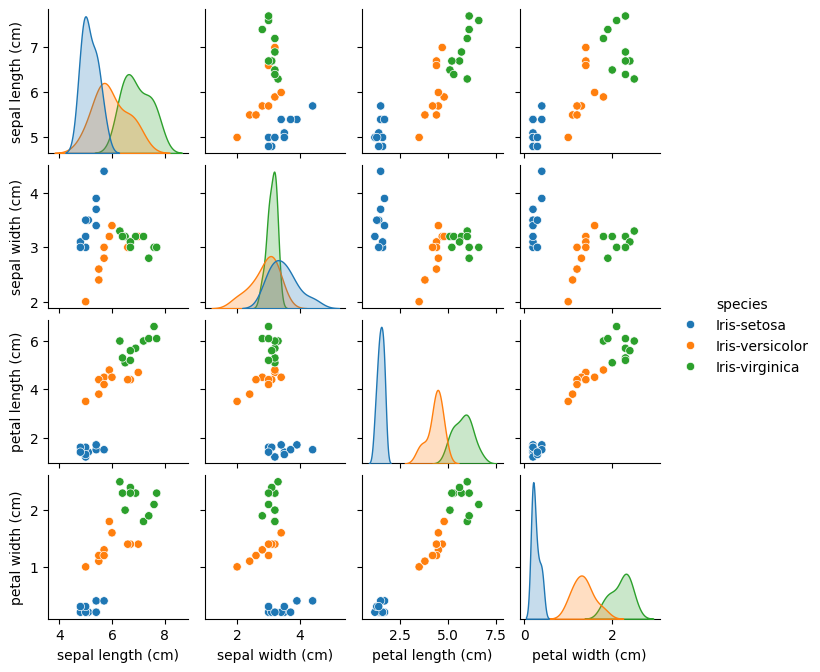

In [4]:
# irisデータ(csv形式)から読み込んでデータフレームを作成
iris_df = pd.read_csv('iris.csv')
print(iris_df.shape)
# データを5行間隔で間引く
iris_df = iris_df.loc[::5]
print(iris_df.shape)
print(iris_df.head())

# ペアプロットを表示
sns.pairplot(iris_df, hue='species', height=1.7)

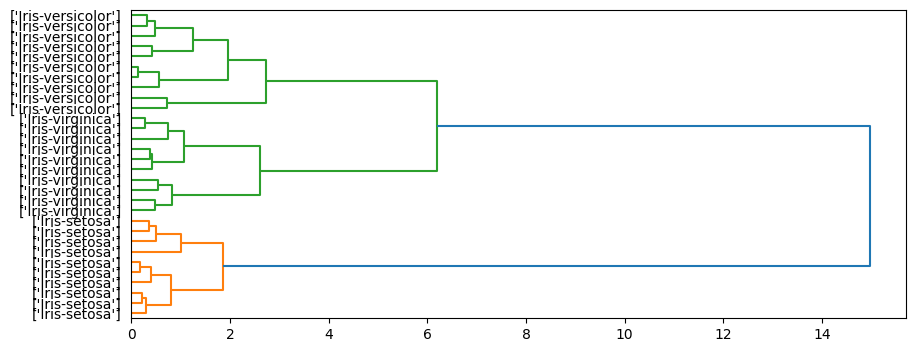

In [5]:
# クラスタリング用のデータとラベルを用意 
iris_data_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
iris_target_df = iris_df[['species']]
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(iris_data_df, metric='euclidean')
# クラスターを統合 (ward法)
linkage = hierarchy.linkage(dist, method='ward', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(10,4))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=iris_target_df.values.tolist())

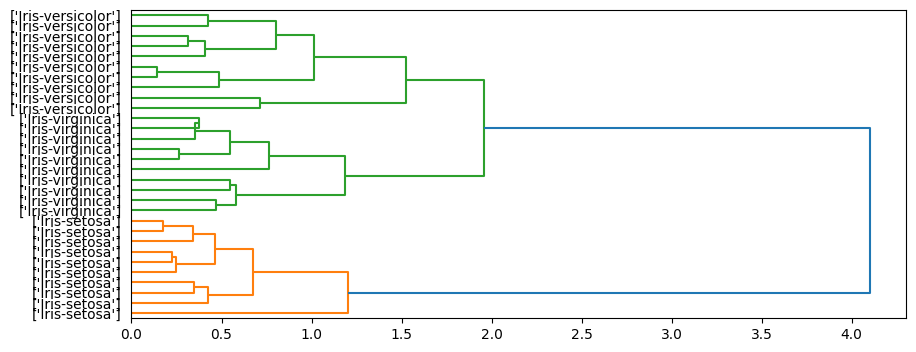

In [6]:
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(iris_data_df, metric='euclidean')
# クラスターを統合 (重心法)
linkage = hierarchy.linkage(dist, method='centroid', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(10,4))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=iris_target_df.values.tolist())

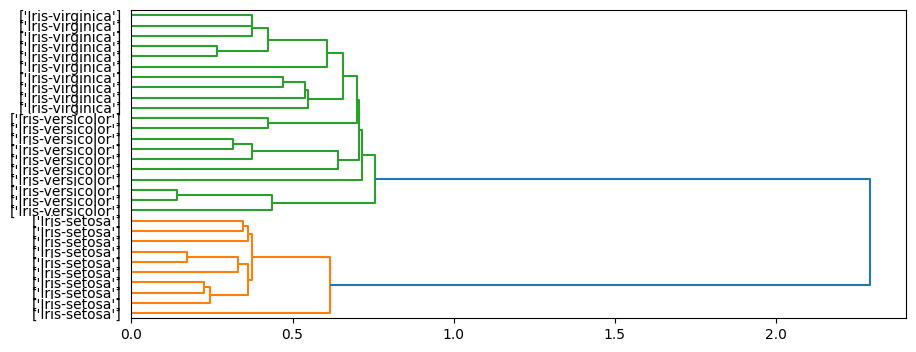

In [7]:
# クラスター間の距離を計算 (ユークリッド距離を利用)
dist = hierarchy.distance.pdist(iris_data_df, metric='euclidean')
# クラスターを統合 (最短距離法)
linkage = hierarchy.linkage(dist, method='single', metric='euclidean') 
# デンドログラムを表示
fig, ax = plt.subplots(figsize=(10,4))
ax = hierarchy.dendrogram(Z=linkage, orientation='right', labels=iris_target_df.values.tolist())

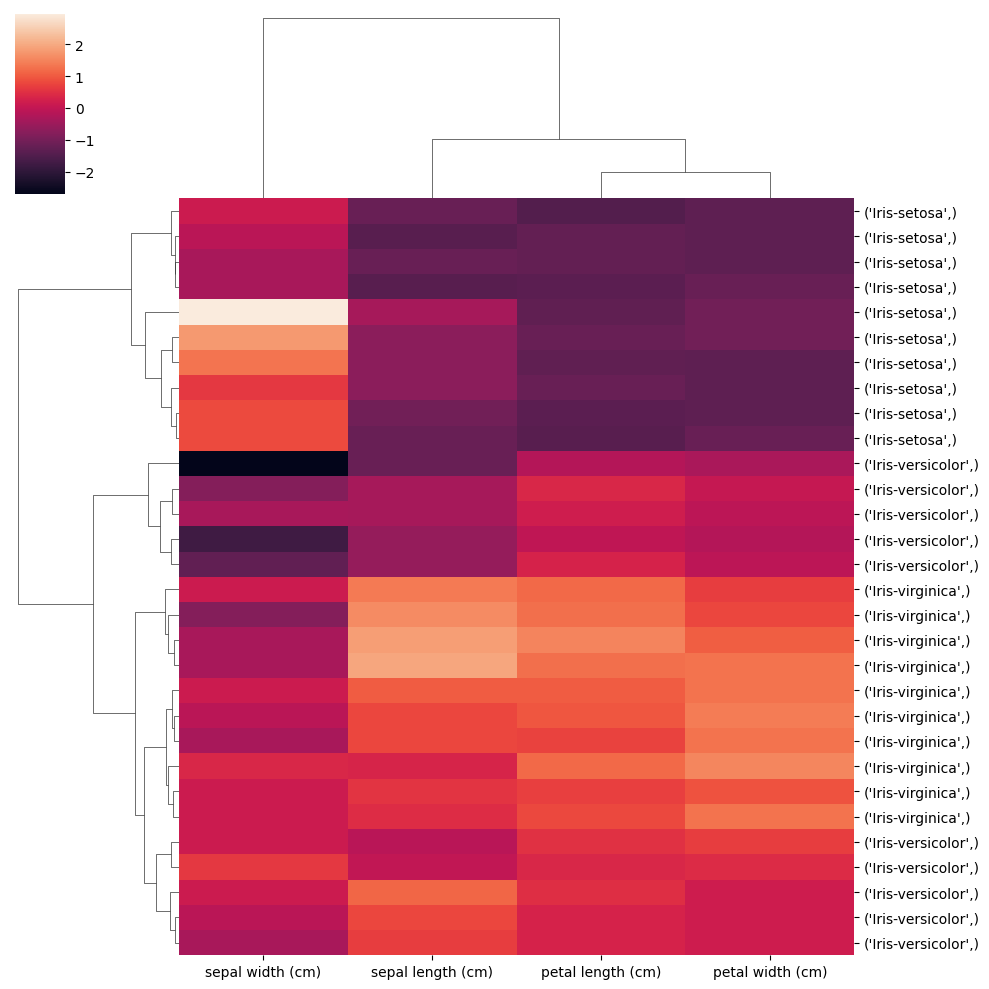

In [8]:
# デンドログラムとヒートマップを組み合わせたクラスターマップを出力
# データを標準化 (平均0,分散1に変換)
scaler = StandardScaler()
iris_data_df = scaler.fit_transform(iris_data_df)
_df = pd.DataFrame(iris_data_df, index=iris_target_df,
                  columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
sns.clustermap(_df, method='ward', metric='euclidean')
plt.show()

<h3>非階層型クラスタリング</h3>

<Figure size 1500x650 with 0 Axes>

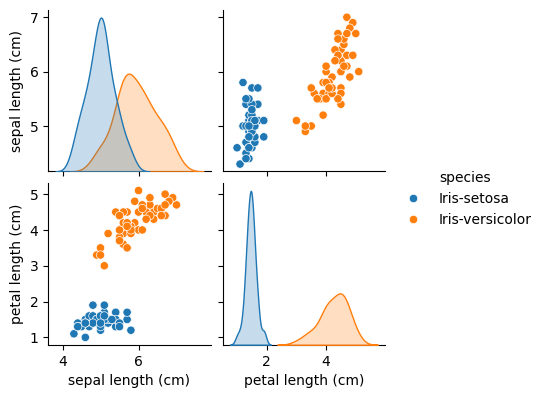

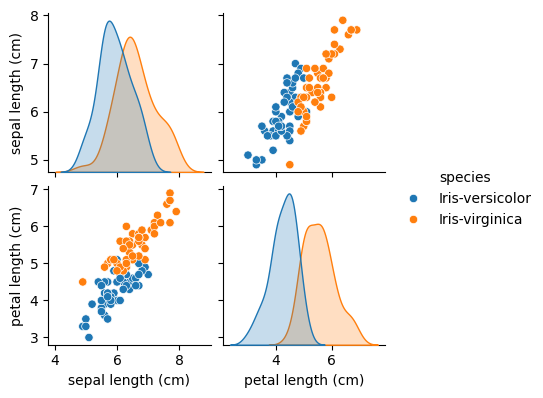

In [9]:
# irisデータ(csv形式)から読み込む
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df[['sepal length (cm)', 'petal length (cm)', 'species']]

# setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_1 = iris_df_1[['sepal length (cm)', 'petal length (cm)']]
iris_target_1 = iris_df_1['species']

# versicolor x virginica のデータフレームを作成
iris_df_2 = iris_df[iris_df['species'] != 'Iris-setosa']
iris_data_2 = iris_df_2[['sepal length (cm)', 'petal length (cm)']]
iris_target_2 = iris_df_2['species']

# ペアプロットを表示
plt.figure(figsize=(15, 6.5))
sns.pairplot(iris_df_1, hue='species', height=2)
sns.pairplot(iris_df_2, hue='species', height=2)

In [10]:
# kmeans法を実行
kmeans_1 = KMeans(n_clusters=2, max_iter=30, init="random")
cluster_1 = kmeans_1.fit(iris_data_1)
kmeans_2 = KMeans(n_clusters=2, max_iter=30, init="random")
cluster_2 = kmeans_2.fit(iris_data_2)

# 散布図表示のコードは notebook で配布

e:\sudspg\su_dspg_ds\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


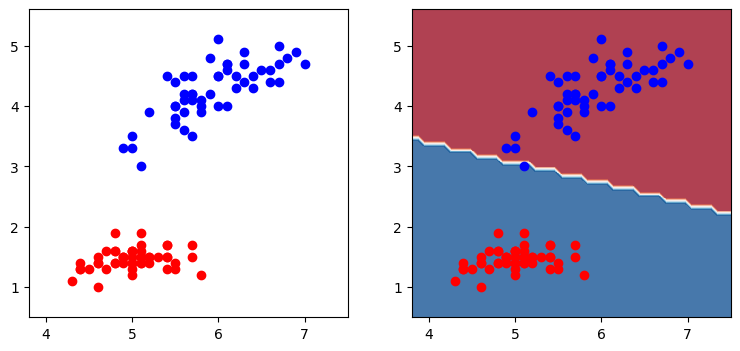

In [11]:
# 散布図表示のコード (1)
x = np.linspace(iris_data_1['sepal length (cm)'].min() - 0.5, iris_data_1['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_1['petal length (cm)'].min() - 0.5, iris_data_1['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -cluster_1.predict(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()

e:\sudspg\su_dspg_ds\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


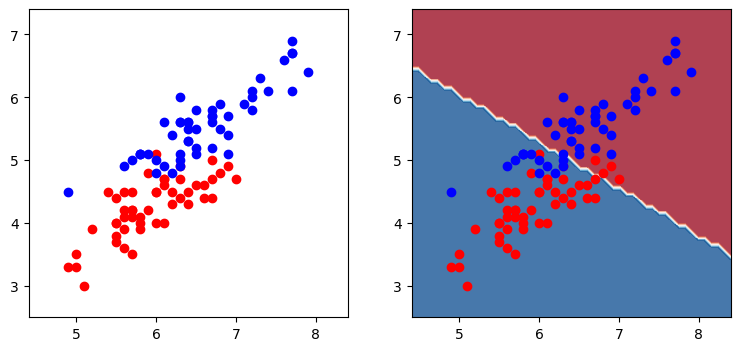

In [12]:
# 散布図表示のコード (2)
x = np.linspace(iris_data_2['sepal length (cm)'].min() - 0.5, iris_data_2['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_2['petal length (cm)'].min() - 0.5, iris_data_2['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -cluster_2.predict(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(14, 4))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()

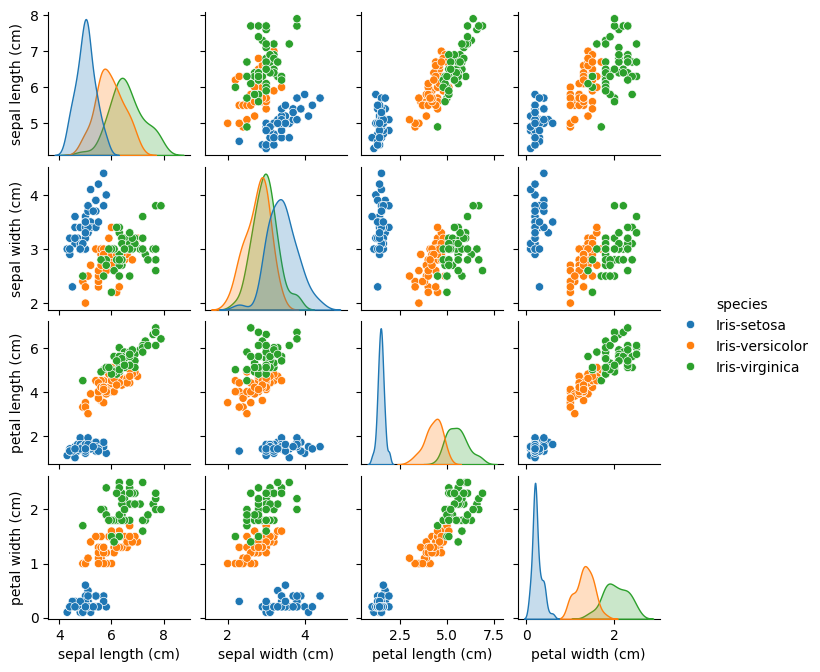

In [13]:
# irisデータ(csv形式)から読み込んでデータフレームを作成
iris_df = pd.read_csv('iris.csv')
# ペアプロットを表示
sns.pairplot(iris_df, hue='species', height=1.7)

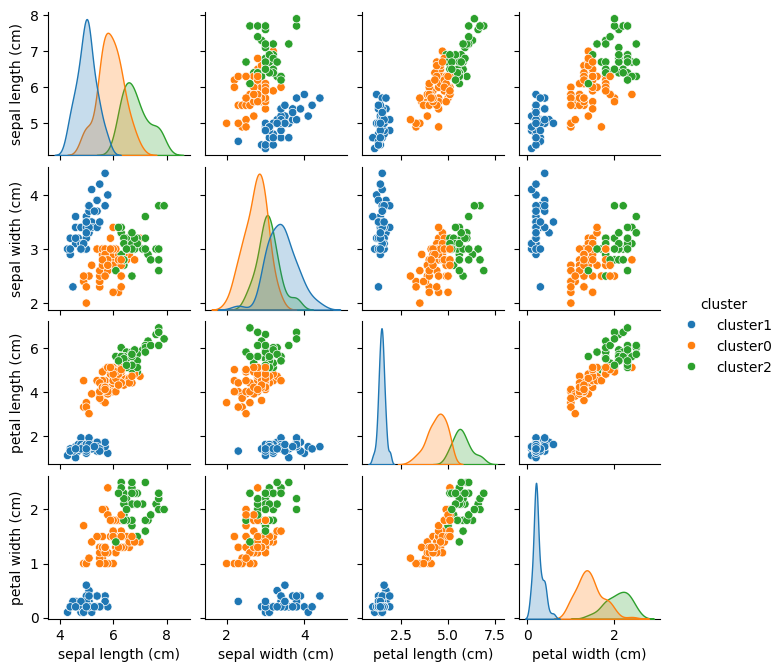

In [14]:
# クラスタリング用のデータとラベルを用意 
iris_data_df = iris_df[['sepal length (cm)', 'sepal width (cm)', 
                        'petal length (cm)', 'petal width (cm)']]
iris_target_df = iris_df[['species']]
# kmeans法を実行
kmeans = KMeans(n_clusters=3, max_iter=30, init="random")
cluster = kmeans.fit_predict(iris_data_df)
# 結果を確認
iris_result = iris_data_df.copy()
iris_result["cluster"] = ["cluster"+str(x) for x in cluster]
sns.pairplot(iris_result, hue='cluster', height=1.7)

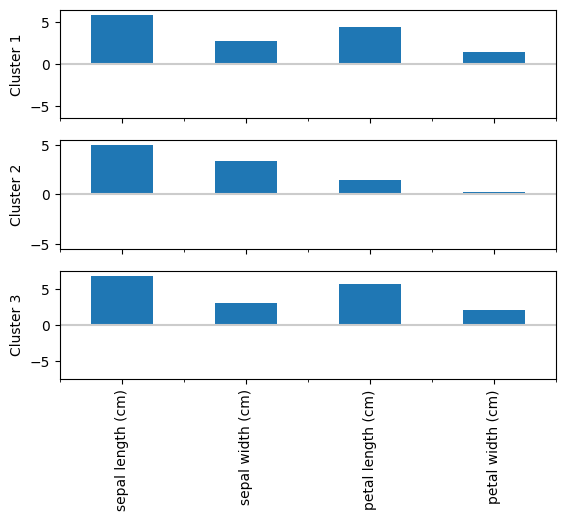

In [15]:
# 各クラスターの重心を棒グラフで表示
# (データサイエンスのための統計学入門 p316 より)
centers = pd.DataFrame(kmeans.cluster_centers_, 
                       columns=['sepal length (cm)', 
                                'sepal width (cm)', 
                                'petal length (cm)', 
                                'petal width (cm)'])
f, axes = plt.subplots(3, 1, sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.1 * np.max(np.max(np.abs(center)))
    center.plot.bar(ax=ax)
    ax.axhline(color='#cccccc')
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC, maxPC)

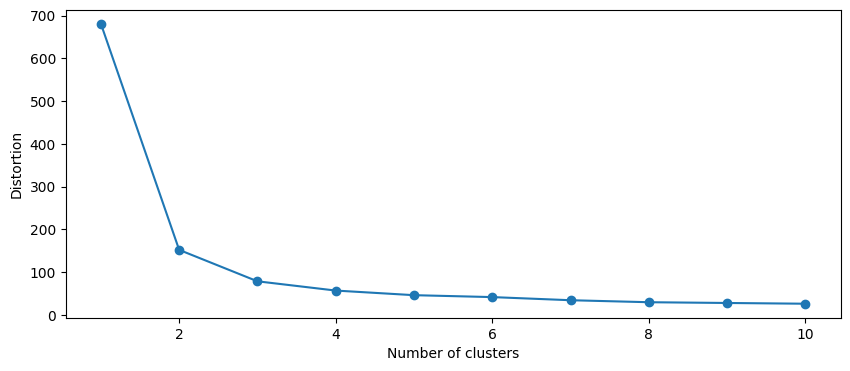

In [16]:
# クラスター数を決定するためのエルボー法を実行
distortions = []

for i  in range(1,11):
    km = KMeans(n_clusters=i, init='random', max_iter=30, random_state=0)
    km.fit(iris_data_df)
    distortions.append(km.inertia_)

plt.figure(figsize=(10,4))
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

<h3>混合分布モデル</h3>

<Figure size 1500x650 with 0 Axes>

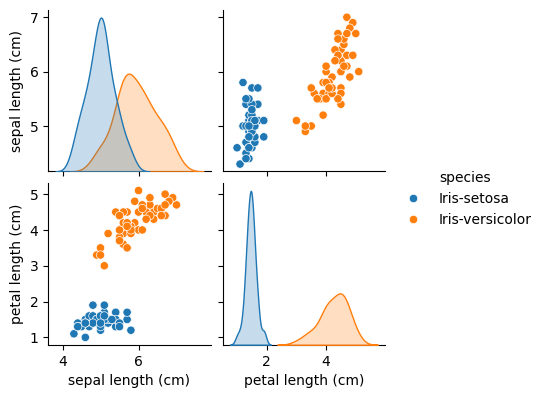

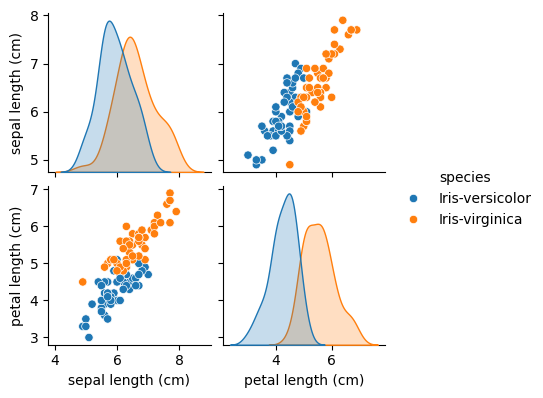

In [17]:
# irisデータ(csv形式)から読み込む
iris_df = pd.read_csv('iris.csv')
iris_df = iris_df[['sepal length (cm)', 'petal length (cm)', 'species']]

# setosa x versicolor のデータフレームを作成
iris_df_1 = iris_df[iris_df['species'] != 'Iris-virginica']
iris_data_1 = iris_df_1[['sepal length (cm)', 'petal length (cm)']]
iris_target_1 = iris_df_1['species']

# versicolor x virginica のデータフレームを作成
iris_df_2 = iris_df[iris_df['species'] != 'Iris-setosa']
iris_data_2 = iris_df_2[['sepal length (cm)', 'petal length (cm)']]
iris_target_2 = iris_df_2['species']

# ペアプロットを表示
plt.figure(figsize=(15, 6.5))
sns.pairplot(iris_df_1, hue='species', height=2)
sns.pairplot(iris_df_2, hue='species', height=2)

In [18]:
# 混合ガウスモデルでクラスタリングを実行
clf_1 = GaussianMixture(n_components=2, covariance_type='full')
clf_1.fit(iris_data_1)
clf_2 = GaussianMixture(n_components=2, covariance_type='full')
clf_2.fit(iris_data_2)

# 散布図表示のコードは notebook で配布

GaussianMixture(n_components=2)

e:\sudspg\su_dspg_ds\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


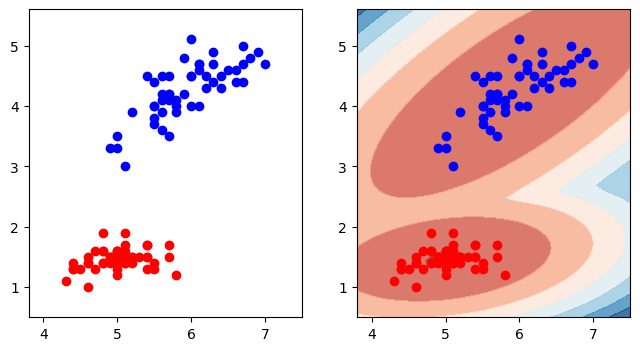

In [19]:
# 散布図表示のコード (1)
x = np.linspace(iris_data_1['sepal length (cm)'].min() - 0.5, iris_data_1['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_1['petal length (cm)'].min() - 0.5, iris_data_1['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf_1.score_samples(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8)
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-setosa']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-setosa']['petal length (cm)'], c='red')
ax.scatter(iris_df_1[iris_df_1['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_1[iris_df_1['species']=='Iris-versicolor']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()

e:\sudspg\su_dspg_ds\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


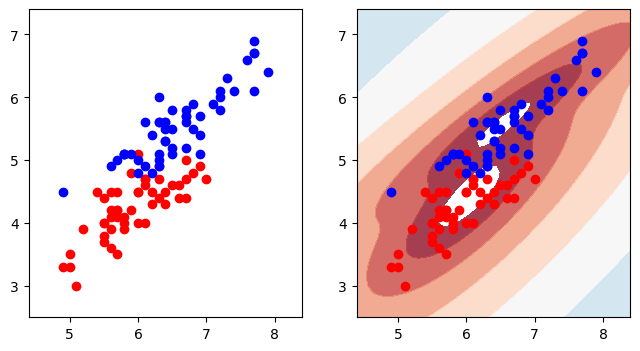

In [20]:
# 散布図表示のコード (2)
x = np.linspace(iris_data_2['sepal length (cm)'].min() - 0.5, iris_data_2['sepal length (cm)'].max() + 0.5)
y = np.linspace(iris_data_2['petal length (cm)'].min() - 0.5, iris_data_2['petal length (cm)'].max() + 0.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf_2.score_samples(XX)
Z = Z.reshape(X.shape)

figure = plt.figure(figsize=(12, 4))
ax = plt.subplot(1, 3, 1)
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax = plt.subplot(1, 3, 2)
CS = ax.contourf(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.8, 
                norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-versicolor']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-versicolor']['petal length (cm)'], c='red')
ax.scatter(iris_df_2[iris_df_2['species']=='Iris-virginica']['sepal length (cm)'], 
           iris_df_2[iris_df_2['species']=='Iris-virginica']['petal length (cm)'], c='blue')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

plt.show()